<a href="https://colab.research.google.com/github/ZahraEk/Digital-Image-Proccesing/blob/main/DIP_EXC3_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import Required libraries 

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Q3 :

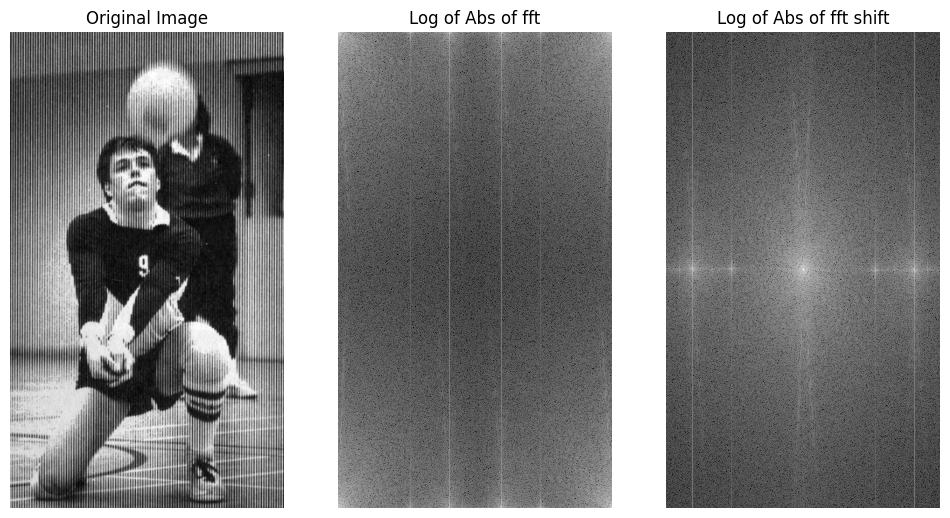

In [2]:
#Read image
img = cv2.imread("drive/MyDrive/DIP_EXC3/Q3/Q3_img.jpg",0)

#Compute the Fourier transform
fft = np.fft.fft2(img)
S_fft = np.log(1+np.abs(fft))

#Shift the Fourier transform
fft_shift = np.fft.fftshift(fft)
fft_shift = np.log(1+np.abs(fft_shift))

#Show images
f, ax = plt.subplots(1,3,figsize=(12,14))

ax[0].imshow(img, cmap='gray')
ax[0].set_title("Original Image")
ax[0].axis('off')
ax[1].imshow(S_fft, cmap='gray')
ax[1].set_title("Log of Abs of fft")
ax[1].axis('off')
ax[2].imshow(fft_shift ,cmap='gray')
ax[2].set_title("Log of Abs of fft shift")
ax[2].axis('off')

plt.show()

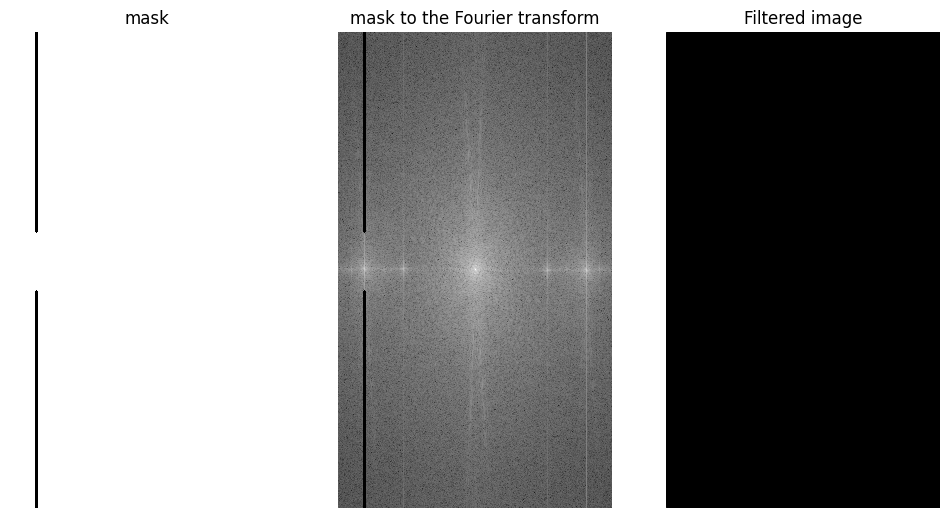

In [20]:
# Get the shape of the image
rows, cols = img.shape

# Create a mask with the same size as the image
mask = np.ones((rows, cols), dtype=np.uint8)

# Draw a line on the mask
start_point1 = (26, 0)  # Starting point of the line
end_point1 = (26, 200)    # Ending point of the line

start_point2 = (26, 260)  # Starting point of the line
end_point2 = (26, 477)    # Ending point of the line

color = 0                 # Color of the line (1 for white in this case)
thickness = 2             # Thickness of the line

cv2.line(mask, start_point1, end_point1, color, thickness)
cv2.line(mask, start_point2, end_point2, color, thickness)

# Apply the mask to the Fourier transform
fshift_filtered = fft_shift * mask

# Shift the filtered Fourier transform back to the original location
f_filtered = np.fft.ifftshift(fshift_filtered)

# Compute the inverse Fourier transform to obtain the filtered image
filtered_image = np.fft.ifft2(f_filtered)
filtered_image = np.abs(filtered_image)

#Show images
f, ax = plt.subplots(1,3,figsize=(12,8))

ax[0].imshow(mask,cmap='gray')
ax[0].set_title("mask")
ax[0].axis('off')
ax[1].imshow(fshift_filtered,cmap='gray')
ax[1].set_title("mask to the Fourier transform")
ax[1].axis('off')
ax[2].imshow(filtered_image,cmap='gray')
ax[2].set_title("Filtered image")
ax[2].axis('off')

plt.show()
